## <font color = 'darkblue'> Funding Challenge </font>
### <font color = 'blue'> Examen Final </font>
#### `Paula Daniela Cárdenas Gallardo | 733720`
#### `Proyecto de Ciencia de Datos | Cristian Camilo Zapata Zuluaga`
> **Viernes 25 de Noviembre de 2022**

___
**`Contenido:`**
+ **Planteamiento del problema**
+ **Datos**
    + Análisis Exploratorio de Datos (EDA)
    + Ingeniería de Características (Data Wrangling)
+ **Modelado**
    + Entrenamiento
    + Validación
    + Evaluación
    + Selección

___
### <font color = 'maroon'> Planetamiento del Problema </font>
El conjunto de datos con el que se trabajará está en este [enlace](https://drive.google.com/file/d/1sQ7Fw0tO9GV-qnErJTQEbnqAACcPc18Q/view). Éste contiene información sobre proyectos que los maestros desarrollan en escuelas de Estados Unidos, buscando mejorar las condiciones de los estudiantes, resolver problemáticas como el *bullying*, mejorar el prendizaje, entre otros. Dentro de la carpeta `Projects_cleansed.zip` se encuentran las siguientes variables:
+ **`Project Title`** $\Rightarrow$ Nombre del proyecto
+ **`Project Short Description`** $\Rightarrow$ Descripción corta del proyecto
+ **`Project Subject Category Tree`** $\Rightarrow$ Taxonomía que indica el área al que pertenece el proyecto
+ **`Project Cost`** $\Rightarrow$ Cantidad que se busca fondear
+ **`Project Current Status`** $\Rightarrow$ Si el proyecto fue fondedado o no (variable de respuesta)

Al final, el modelo deberá recibir como entrada una descripción textual sobre un proyecto para predecir si se le otorgarán fondos o no, $1$ siendo que sí y $0$ que no.

___
### <font color = 'maroon'> Datos </font>

In [1]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
import pickle
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import recall_score, confusion_matrix, make_scorer, accuracy_score, precision_score,  f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold,  GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar datos
data = pd.read_csv('Projects_cleansed.csv')
data

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded
...,...,...,...,...,...
1109976,Screen Printing 101,Most of the scholars had no idea that they wou...,Music & The Arts,633.84,Fully Funded
1109977,Flexible Seating for Super Second Graders!,My students are super second graders!!! Our sc...,"Literacy & Language, Math & Science",626.24,Live
1109978,Growing Artists!,"I teach at a Title I school, and 76% of studen...","Literacy & Language, Music & The Arts",193.13,Fully Funded
1109979,TIME For Kids!,I teach at a Title I school for a district tha...,Literacy & Language,246.18,Live


___
**`EDA`**

In [3]:
# Conocer los datos

# Se guardan los datos como un DataFrame de pandas
print(f'+ Tipo: \n {type(data)}')

# El tamaño de los datos se visualiza en una tupla; primero la cantidad de filas y después el número de columnas
print(f'\n+ Dimensión de los datos: \n {data.shape}')

# Tipo de cada variable
print(f'\n+ Tipo de datos por columna: \n{data.dtypes}')

# Conteo de valores nulos
print(f'\n+ Cantidad de nulos por columna: \n{data.isnull().sum()}')

# Valores únicos
print(f'\n+ Valores únicos por columna: \n{data.nunique()}')

+ Tipo: 
 <class 'pandas.core.frame.DataFrame'>

+ Dimensión de los datos: 
 (1109981, 5)

+ Tipo de datos por columna: 
Project Title                     object
Project Short Description         object
Project Subject Category Tree     object
Project Cost                     float64
Project Current Status            object
dtype: object

+ Cantidad de nulos por columna: 
Project Title                    0
Project Short Description        0
Project Subject Category Tree    0
Project Cost                     0
Project Current Status           0
dtype: int64

+ Valores únicos por columna: 
Project Title                    926099
Project Short Description        841865
Project Subject Category Tree        51
Project Cost                     163022
Project Current Status                3
dtype: int64


In [4]:
# Valores estadísticos de la variable numérica
data.describe()

,Project Cost
count,1.109981e+06
mean,7.415194e+02
std,1.083264e+03
min,3.529000e+01
25%,3.351200e+02
50%,5.153500e+02
75%,8.675100e+02
max,2.557377e+05


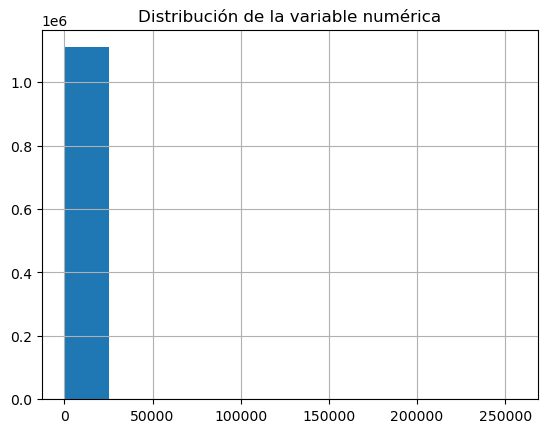

In [5]:
# Visualización de la variable numérica
data['Project Cost'].hist()
plt.title("Distribución de la variable numérica")
plt.show()

Nos damos cuenta que la variable numérica cuenta con valores atípicos así que serán tratados, primero se visualizarán:

Mediana: 515.35
Datos perdidos: 0.13%


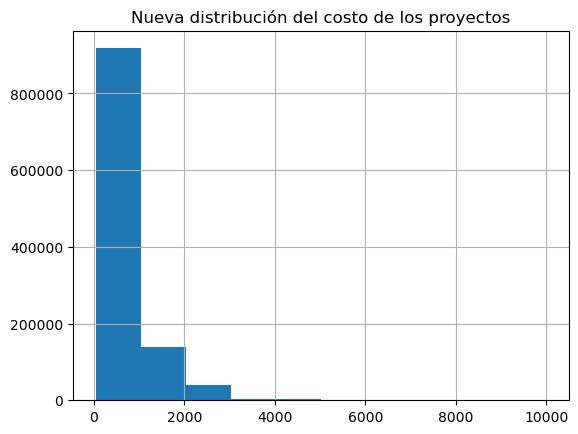

In [6]:
print(f'Mediana: {data["Project Cost"].median()}')
print(f"Datos perdidos: {round(data[data['Project Cost']>10000].shape[0]*100/data.shape[0], 2)}%")

# Eliminar los datos mayores a 10000
data = data[data['Project Cost']<10000]

# Visualizar la distribución
data['Project Cost'].hist()
plt.title("Nueva distribución del costo de los proyectos")
plt.show()

In [7]:
# Visualizar ejemplos de proyectos
for project in range(3):
    print(f"\nProyecto #{project}:")
    print(f" Título: \n  {data['Project Title'][project]} \n\n Descripción: \n  {data['Project Short Description'][project]} \
    \n\n Categorías: \n  {data['Project Subject Category Tree'][project]}")


Proyecto #0:
 Título: 
  Stand Up to Bullying: Together We Can! 

 Descripción: 
  Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of...     

 Categorías: 
  Applied Learning

Proyecto #1:
 Título: 
  Learning in Color! 

 Descripción: 
  Help us have a fun, interactive listening center in our class! Did you struggle to read when you were younger? Did it help to see the words and hear them read to you at the same time? This...     

 Categorías: 
  Applied Learning, Literacy & Language

Proyecto #2:
 Título: 
  Help Second Grade ESL Students Develop Language to Speak and Read 

 Descripción: 
  Visiting or moving to a new place can be very exciting yet frightening at the same time especially if you are unfamiliar with the native language. Learning a second language is a difficult...     

 Categorías: 
  Literacy & Language


**`Data Wrangling`**

In [8]:
# Visualizar el texto de los títulos y descripciones
data[['Project Title', 'Project Short Description']]

,Project Title,Project Short Description
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...
1,Learning in Color!,"Help us have a fun, interactive listening cent..."
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s..."
...,...,...
1109976,Screen Printing 101,Most of the scholars had no idea that they wou...
1109977,Flexible Seating for Super Second Graders!,My students are super second graders!!! Our sc...
1109978,Growing Artists!,"I teach at a Title I school, and 76% of studen..."
1109979,TIME For Kids!,I teach at a Title I school for a district tha...


Se limpiará el texto para poder vectorizarlo y que los modelos de *machine learning* puedan interpretar las variables.

In [9]:
# Limpiar el texto de las variables "Project Title" y "Project Short Description"
for col in ['Project Title', 'Project Short Description']:
    cleaned_text = []
    for title in data[col]:
        title = title.lower()
        cleaned_text.append(re.sub('[^a-zA-Z]+', ' ', title))
    data[col] = cleaned_text

data[['Project Title', 'Project Short Description']]

,Project Title,Project Short Description
0,stand up to bullying together we can,did you know that students in grades k is eith...
1,learning in color,help us have a fun interactive listening cente...
2,help second grade esl students develop languag...,visiting or moving to a new place can be very ...
3,help bilingual students strengthen reading com...,students at our school are still working hard ...
4,help us make each minute count,idle hands were something that issac watts sp...
...,...,...
1109976,screen printing,most of the scholars had no idea that they wou...
1109977,flexible seating for super second graders,my students are super second graders our schoo...
1109978,growing artists,i teach at a title i school and of students re...
1109979,time for kids,i teach at a title i school for a district tha...


In [10]:
# Tratar las variable de las categorías
print(f"\nCategorías del proyecto: {data['Project Subject Category Tree'].unique()}")


Categorías del proyecto: ['Applied Learning' 'Applied Learning, Literacy & Language'
 'Literacy & Language' 'Special Needs'
 'Literacy & Language, History & Civics' 'Math & Science'
 'History & Civics, Math & Science' 'Literacy & Language, Special Needs'
 'Applied Learning, Special Needs' 'Health & Sports, Special Needs'
 'Math & Science, Literacy & Language'
 'Literacy & Language, Math & Science'
 'Literacy & Language, Music & The Arts' 'Math & Science, Special Needs'
 'Health & Sports' 'Music & The Arts' 'Math & Science, Applied Learning'
 'Literacy & Language, Applied Learning'
 'Applied Learning, Music & The Arts'
 'History & Civics, Literacy & Language'
 'Applied Learning, Math & Science' 'Health & Sports, Math & Science'
 'Applied Learning, Health & Sports' 'History & Civics'
 'History & Civics, Music & The Arts' 'Math & Science, History & Civics'
 'Math & Science, Music & The Arts' 'Special Needs, Music & The Arts'
 'History & Civics, Applied Learning' 'History & Civics, Specia

In [11]:
data['Project Subject Category Tree'] = data['Project Subject Category Tree'].str.split(', ')
data = data.explode('Project Subject Category Tree')
print(f"\nCategoría del proyecto: {data['Project Subject Category Tree'].unique()}")


Categoría del proyecto: ['Applied Learning' 'Literacy & Language' 'Special Needs'
 'History & Civics' 'Math & Science' 'Health & Sports' 'Music & The Arts'
 'Warmth' 'Care & Hunger']


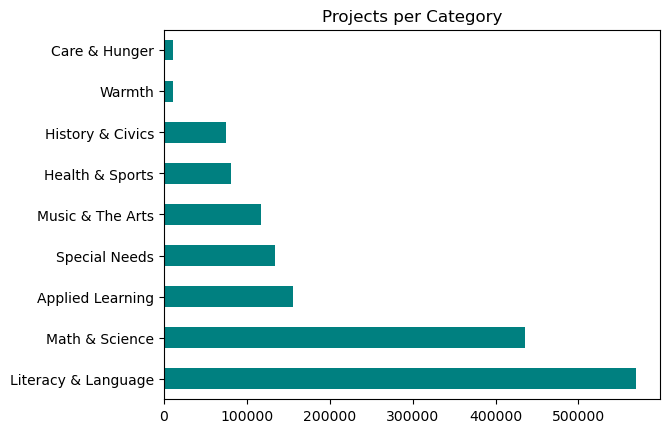

In [12]:
# Visualizar la cantidad de proyectos por categoría
data['Project Subject Category Tree'].value_counts().plot(kind='barh', color='teal')
plt.title("Projects per Category")
plt.show()

In [13]:
data['Project Subject Category Tree'].value_counts()

Literacy & Language    569687
Math & Science         435955
Applied Learning       155497
Special Needs          133699
Music & The Arts       116806
Health & Sports         80497
History & Civics        75289
Warmth                  10506
Care & Hunger           10506
Name: Project Subject Category Tree, dtype: int64

In [14]:
categories = {'Literacy & Language': 9,
              'Math & Science': 8,
              'Applied Learning': 7,
              'Special Needs': 6,
              'Music & The Arts': 5,
              'Health & Sports': 4,
              'History & Civics': 3,
              'Warmth': 2,
              'Care & Hunger': 1}
data['Project Subject Category Tree'] = data['Project Subject Category Tree'].replace(categories)
data.head()

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
0,stand up to bullying together we can,did you know that students in grades k is eith...,7,361.80,Fully Funded
1,learning in color,help us have a fun interactive listening cente...,7,512.85,Expired
1,learning in color,help us have a fun interactive listening cente...,9,512.85,Expired
2,help second grade esl students develop languag...,visiting or moving to a new place can be very ...,9,435.92,Fully Funded
3,help bilingual students strengthen reading com...,students at our school are still working hard ...,9,161.26,Fully Funded


Para fines prácticos, los proyectos que se clasifican como "Fully Funded" obtendrán el valor binario de $1$ y al resto ("Expired" y "Live") se les asignará un "0" dado que no fueron fondeados o no han sido. Se decide de esta manera ya que si en la vida real los proyectos "Live" no fueran seleccionados, no perjudicaríamos a quienes fondean los proyectos al "comprometerlos" con un sí.

In [15]:
categories = {'Fully Funded': 1,
              'Expired': 0,
              'Live': 0}
data['Project Current Status'] = data['Project Current Status'].replace(categories)
data.head()

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
0,stand up to bullying together we can,did you know that students in grades k is eith...,7,361.80,1
1,learning in color,help us have a fun interactive listening cente...,7,512.85,0
1,learning in color,help us have a fun interactive listening cente...,9,512.85,0
2,help second grade esl students develop languag...,visiting or moving to a new place can be very ...,9,435.92,1
3,help bilingual students strengthen reading com...,students at our school are still working hard ...,9,161.26,1


Vectorización de las variables con texto

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Crear función para el objetco vectorizador
def vectorizer(col, data):
    # Crear el objeto vectorizador
    Vectorizer = CountVectorizer(max_features=150, # Palabras máximas
                                 min_df= 50, # Archivos mínimos donde debe aparecer la palabra
                                 max_df= 0.7, # Porcentaje de archivos máximos donde debe aparecer
                                 stop_words=stopwords.words('english')) # Eliminar stopwords
    # Crear el corpus
    text = []
    for row in data[col]:
        text.append(row)
        
    # Crear el BOW (Bag Of Words) con el vectorizador
    my_bow = Vectorizer.fit_transform(text).toarray()
    
    # Transformar el BOW en un TF-IDF 
    transformer = TfidfTransformer()                        # Crear el objeto TF-IDF
    transformer = transformer.fit(my_bow)                   # Transformar
    my_tfidf = transformer.fit_transform(my_bow).toarray()  # Ejecutar
    
    # Convertir a dataframe
    final = pd.DataFrame(my_tfidf)

    # Hacer merge con los datos
    data = final.merge(data, right_index=True, left_index=True)

    # Eliminar la columna original (con texto)
    data.drop(columns=[col], inplace=True)
    return data, vectorizer, transformer

Se intentó realizar el mismo procedimiento para los títulos y las descripciones pero hubo un error en la memoría, por lo que únicamente se trabajará con la variable de las descripciones, ya que será el *input* recibido para la predicción final.
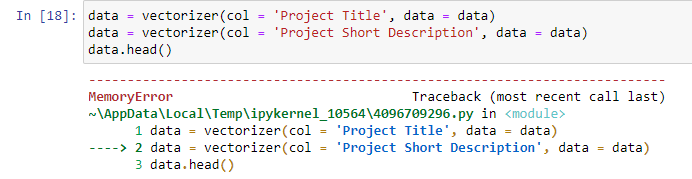

In [18]:
data, vetorizer_proj, transformer = vectorizer(col = 'Project Short Description', data = data)
data.drop(columns=['Project Title'], inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,Project Subject Category Tree,Project Cost,Project Current Status
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,361.80,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,512.85,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,512.85,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,435.92,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,161.26,1


___
### <font color = 'maroon'> Modelado </font>

In [19]:
# Identificar las variables predictoras y las objetivo
respuesta= ['Project Current Status']
predictoras= [c for c in data.columns if c not in respuesta]
print(f'Predictoras:\n {predictoras} \n\nObetivo:\n {respuesta}')

Predictoras:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 'Project Subject Category Tree', 'Project Cost'] 

Obetivo:
 ['Project Current Status']


In [20]:
# Dividir los datos en dos grupos; 70% de entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(data[predictoras],
                                                    data[respuesta],
                                                    test_size=0.3,
                                                    random_state = 42)

# Entrenamiento y prueba solo con la descripción
not_allowed = ['Project Current Status', 'Project Subject Category Tree', 'Project Cost']
predictoras= [c for c in data.columns if c not in not_allowed]
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(data[predictoras],
                                                       data[respuesta],
                                                       test_size=0.3,
                                                       random_state = 42)

**`Regresión Logística`**

In [21]:
# Entrenar la Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)
model_desc = LogisticRegression()
model_desc.fit(X_train_desc, y_train_desc)

# Probando el Modelo
y_pred = model.predict(X_test)
y_pred_desc = model_desc.predict(X_test_desc)

In [22]:
# Evaluar el modelo con el accuracy y con una matriz de confusión
acc_LG = model.score(X_test, y_test)
print("Con todas las variables:")
print(f"Accuracy: {acc_LG}")

matrix = confusion_matrix(y_test, y_pred)
print()
print("Confusion Matrix")
print(pd.DataFrame(matrix))
print()
print("\nCon la descripción:")
acc_LG_desc = model_desc.score(X_test_desc, y_test_desc)
print(f"Accuracy: {acc_LG_desc}")

matrix_desc = confusion_matrix(y_test_desc, y_pred_desc)
print("Confusion Matrix")
print(pd.DataFrame(matrix_desc))

Con todas las variables:
Accuracy: 0.7467478642612368

Confusion Matrix
      0       1
0  9430  112300
1  8383  346420


Con la descripción:
Accuracy: 0.7445507446493737
Confusion Matrix
   0       1
0  0  121730
1  0  354803


**`Random Forest`**

In [23]:
# Crear el modelo con los hiperparámetros
model_RF = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  bootstrap=True,
                                  oob_score=False,
                                  random_state=0,
                                  verbose=0)

model_RF_desc = RandomForestClassifier(n_estimators=100,
                                       max_depth=10,
                                       min_samples_split=10,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       oob_score=False,
                                       random_state=0,
                                       verbose=0)
# Entrenar
model_RF.fit(X_train, y_train)
model_RF_desc.fit(X_train_desc, y_train_desc)


# Evaluar
yhat = model_RF.predict(X_test)
yhat_desc = model_RF_desc.predict(X_test_desc)

In [24]:
# Evaluar del modelo
print("\nCon todas la variables:")
acc_RF = accuracy_score(y_test, yhat)
print(f"Accuracy: {acc_RF}")
print("\nCon la descripción:")
acc_RF_desc = accuracy_score(y_test_desc, yhat_desc)
print(f"Accuracy: {acc_RF_desc}")


Con todas la variables:
Accuracy: 0.7445507446493737

Con la descripción:
Accuracy: 0.7445507446493737


**`Resultados`**

In [25]:
# Crear tabla con los resultados
resultados = {'Modelo': ['Logistic Regression','Random Forest', 'Logistic Regression Desc','Random Forest Desc'], 
              'R2': [acc_LG, acc_RF, acc_LG_desc, acc_RF_desc]}
resultados = pd.DataFrame(resultados)
resultados

,Modelo,R2
0,Logistic Regression,0.746748
1,Random Forest,0.744551
2,Logistic Regression Desc,0.744551
3,Random Forest Desc,0.744551


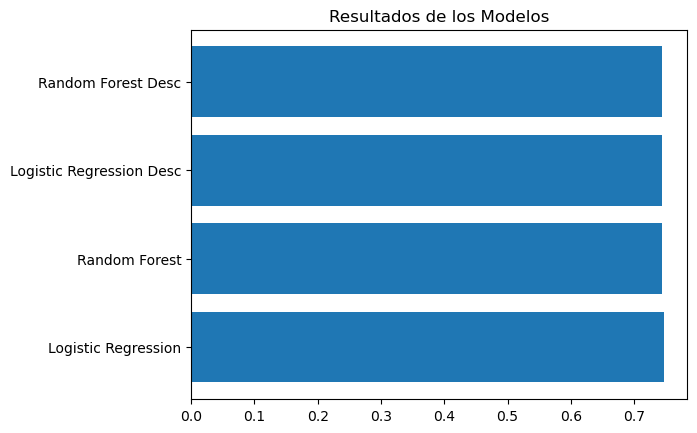

In [26]:
plt.barh(resultados['Modelo'], resultados['R2'])
plt.title("Resultados de los Modelos")
plt.show()

El modelo que se considera mejor es aquel que tenga un *accuracy* más alto, ya que no interesa que tenga mayor precisión tanto en los $1$ como en los $0$. En este caso, el mejor con todas las variables fue la regresión logística y con únicamente la descripción también, aunque los resultados fueron muy similares respecto al bosque aleatorio. De igual forma, es un modelo más sencillo de implementar e interpretar. Se guardarán como un *pickle* junto con el transformador y vectorizador para utilizarlos para la *API*.

In [27]:
# Regresión logística con todas las variables
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# C con las descripciones vectorizadas
with open('model_desc.pickle', 'wb') as f:
    pickle.dump(model_desc, f)

# Transformador
with open('tf_idf.pickle', 'wb') as f:
    pickle.dump(transformer, f)

# Vectorizador
with open('vectorizer.pickle', 'wb') as f:
    pickle.dump(vetorizer_proj, f)